In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

In [2]:
from AdaBoost_implementation import AdaBoost

### Data

In [65]:
X,y = datasets.make_hastie_10_2(n_samples=20000, random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

## Discrete AdaBoost vs. Real AdaBoost - Overfitting

In [4]:
M = 800
learning_rate = 1.0

In [5]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                        method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

In [6]:
ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,
                    method="real",tol=None)
ada_real.fit(X_train, y_train)

In [7]:
ada_discrete_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

(-0.02, 0.5)

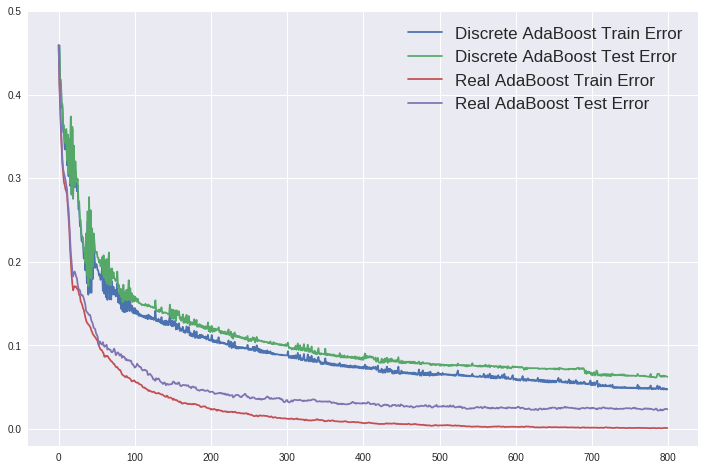

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err_train, label="Discrete AdaBoost Train Error")
ax.plot(np.arange(M), ada_discrete_err, label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err_train, label="Real AdaBoost Train Error")
ax.plot(np.arange(M), ada_real_err, label="Real AdaBoost Test Error")

ax.legend(loc='upper right', fontsize=17)
ax.set_ylim([-0.02,0.5])
# ax.xaxis.set_ticks([0,1000,1500,2000])
# ax.set_xticks([0,1000,2000])
# ax.xaxis.set_ticklabels(["a","b"])

### 10000 iterations

In [9]:
M = 10000
learning_rate = 1.0

In [10]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,method="real",tol=None)
ada_real.fit(X_train, y_train)

In [11]:
ada_discrete_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

(-0.02, 0.5)

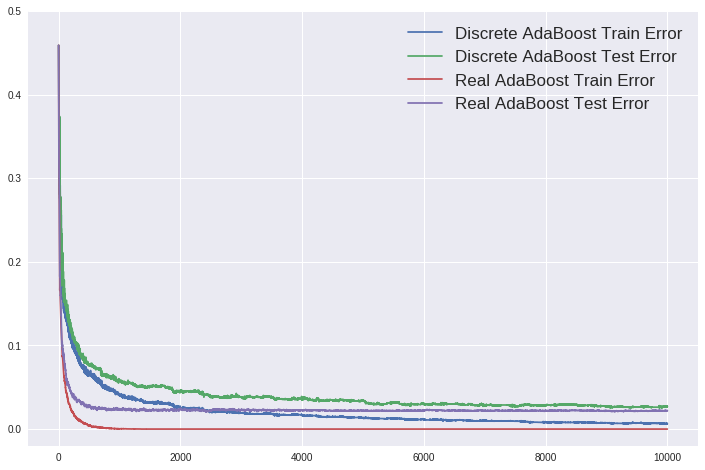

In [12]:
# M = 10000
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err_train, label="Discrete AdaBoost Train Error")
ax.plot(np.arange(M), ada_discrete_err, label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err_train, label="Real AdaBoost Train Error")
ax.plot(np.arange(M), ada_real_err, label="Real AdaBoost Test Error")

ax.legend(loc='upper right', fontsize=17)
ax.set_ylim([-0.02,0.5])

### 10000 iterations with different learning rate

In [13]:
M = 10000
learning_rate_discrete = 0.8
learning_rate_real = 0.1

In [14]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),
                        learning_rate=learning_rate_discrete, method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),
                    learning_rate=learning_rate_real, method="real",tol=None)
ada_real.fit(X_train, y_train)

In [15]:
ada_discrete_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_train = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

(-0.02, 0.5)

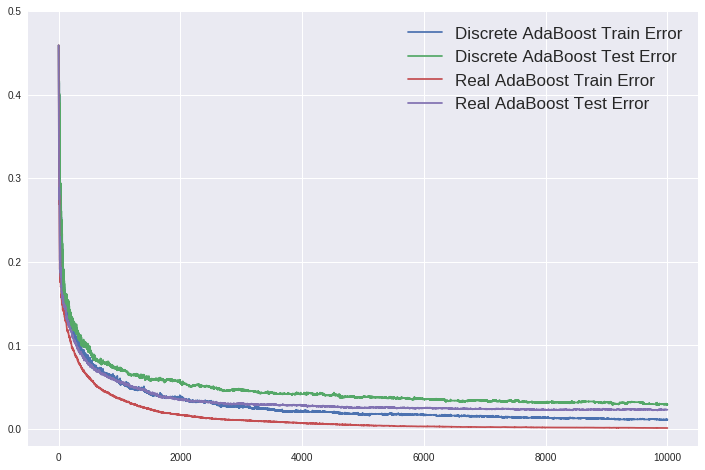

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err_train, label="Discrete AdaBoost Train Error")
ax.plot(np.arange(M), ada_discrete_err, label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err_train, label="Real AdaBoost Train Error")
ax.plot(np.arange(M), ada_real_err, label="Real AdaBoost Test Error")

ax.legend(loc='upper right', fontsize=17)
ax.set_ylim([-0.02,0.5])

-----

## Weight Trimming

In [17]:
M = 2000
learning_rate = 1.0

In [18]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                        method="discrete",tol=None,weight_trimming=None)
ada_discrete.fit(X_train, y_train)

In [19]:
ada_discrete_wt95 = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                           method="discrete",tol=None,weight_trimming=0.95)
ada_discrete_wt95.fit(X_train, y_train)

In [20]:
ada_discrete_wt99 = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                           method="discrete",tol=None,weight_trimming=0.99)
ada_discrete_wt99.fit(X_train, y_train)

In [21]:
ada_discrete_wt999 = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                           method="discrete",tol=None,weight_trimming=0.999)
ada_discrete_wt999.fit(X_train, y_train)

In [22]:
ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                    method="real",tol=None,weight_trimming=None)
ada_real.fit(X_train, y_train)

In [23]:
M_real = 2000
learning_rate = 0.2

In [24]:
ada_real = AdaBoost(M=M_real, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                       method="real",tol=None,weight_trimming=None)
ada_real.fit(X_train, y_train)

In [25]:
ada_real_wt95 = AdaBoost(M=M_real, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                       method="real",tol=None,weight_trimming=0.95)
ada_real_wt95.fit(X_train, y_train)

In [26]:
ada_real_wt99 = AdaBoost(M=M_real, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                       method="real",tol=None,weight_trimming=0.99)
ada_real_wt99.fit(X_train, y_train)

In [27]:
ada_real_wt999 = AdaBoost(M=M_real, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                       method="real",tol=None,weight_trimming=0.999)
ada_real_wt999.fit(X_train, y_train)

In [28]:
ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_discrete_err_wt95 = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete_wt95.stage_predict(X_test)):
    ada_discrete_err_wt95[i] = zero_one_loss(y_pred, y_test)
    
ada_discrete_err_wt99 = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete_wt99.stage_predict(X_test)):
    ada_discrete_err_wt99[i] = zero_one_loss(y_pred, y_test)
    
ada_discrete_err_wt999 = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete_wt999.stage_predict(X_test)):
    ada_discrete_err_wt999[i] = zero_one_loss(y_pred, y_test)

In [29]:
ada_real_err = np.zeros((M_real,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_wt95 = np.zeros((M_real,))
for i, y_pred in enumerate(ada_real_wt95.stage_predict(X_test)):
    ada_real_err_wt95[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_wt99 = np.zeros((M_real,))
for i, y_pred in enumerate(ada_real_wt99.stage_predict(X_test)):
    ada_real_err_wt99[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err_wt999 = np.zeros((M_real,))
for i, y_pred in enumerate(ada_real_wt999.stage_predict(X_test)):
    ada_real_err_wt999[i] = zero_one_loss(y_pred, y_test)

Text(0,0.5,'Error Rate')

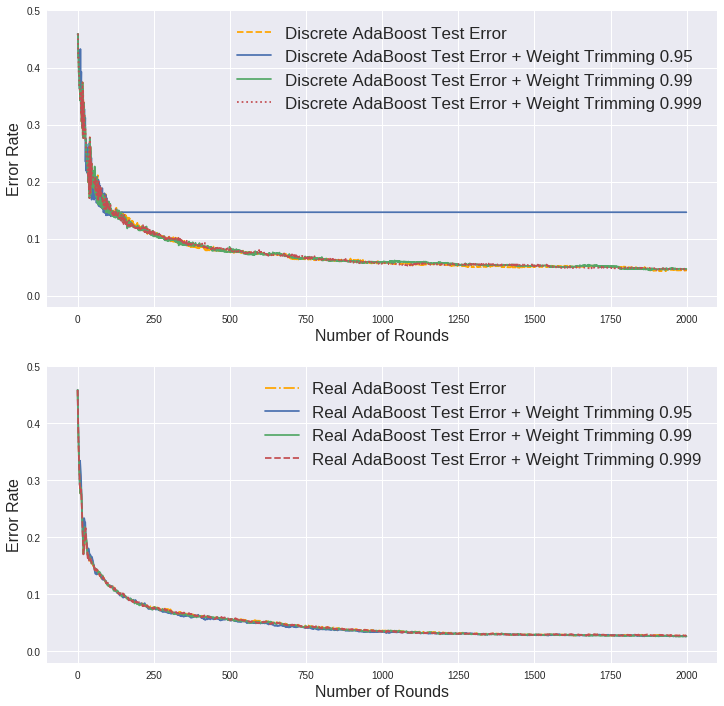

In [30]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,12))

ax1.plot(np.arange(M), ada_discrete_err, '--',color="orange",label="Discrete AdaBoost Test Error")
ax1.plot(np.arange(M), ada_discrete_err_wt95,label="Discrete AdaBoost Test Error + Weight Trimming 0.95")
ax1.plot(np.arange(M), ada_discrete_err_wt99, label="Discrete AdaBoost Test Error + Weight Trimming 0.99")
ax1.plot(np.arange(M), ada_discrete_err_wt999, ':',label="Discrete AdaBoost Test Error + Weight Trimming 0.999")

ax1.legend(loc="best", fontsize=17)
ax1.set_ylim([-0.02,0.5])
ax1.set_xlabel("Number of Rounds",fontsize=16)
ax1.set_ylabel("Error Rate",fontsize=16)

ax2.plot(np.arange(M_real), ada_real_err, '-.',color="orange",label="Real AdaBoost Test Error")
ax2.plot(np.arange(M_real), ada_real_err_wt95, label="Real AdaBoost Test Error + Weight Trimming 0.95")
ax2.plot(np.arange(M_real), ada_real_err_wt99, label="Real AdaBoost Test Error + Weight Trimming 0.99")
ax2.plot(np.arange(M_real), ada_real_err_wt999, '--', label="Real AdaBoost Test Error + Weight Trimming 0.999")

ax2.legend(loc="best", fontsize=17)
ax2.set_ylim([-0.02,0.5])
ax2.set_xlabel("Number of Rounds",fontsize=16)
ax2.set_ylabel("Error Rate",fontsize=16)

-----

## Learning Curve

In [98]:
X,y = datasets.make_hastie_10_2(n_samples=5000, random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.5)

In [104]:
M_discrete = 100
M_real = 100
learning_rate = 1.0

In [109]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_errors, test_errors = [], []
    for m in range(10, len(X_train)+5, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(zero_one_loss(y_train[:m], y_train_predict))
        test_errors.append(zero_one_loss(y_test, y_test_predict))
        
    ax.plot(np.arange(10, len(X_train)+5, 10),train_errors, linewidth=2, label="train")   # np.arange(10, M, 100),
    ax.plot(np.arange(10, len(X_train)+5, 10),test_errors,color="orange", linewidth=2, label="test")
    # plt.xtick_labels("3")
    # xticks([]), yticks([])
    ax.legend(loc="best", fontsize=17)
    ax.set_xlabel("Training set size", fontsize=16)
    ax.set_ylabel("error rate", fontsize=16)

In [110]:
ada_discrete = AdaBoost(M=M_discrete, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,method="discrete",tol=None)

In [111]:
ada_real = AdaBoost(M=M_real, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,method="real",tol=None)

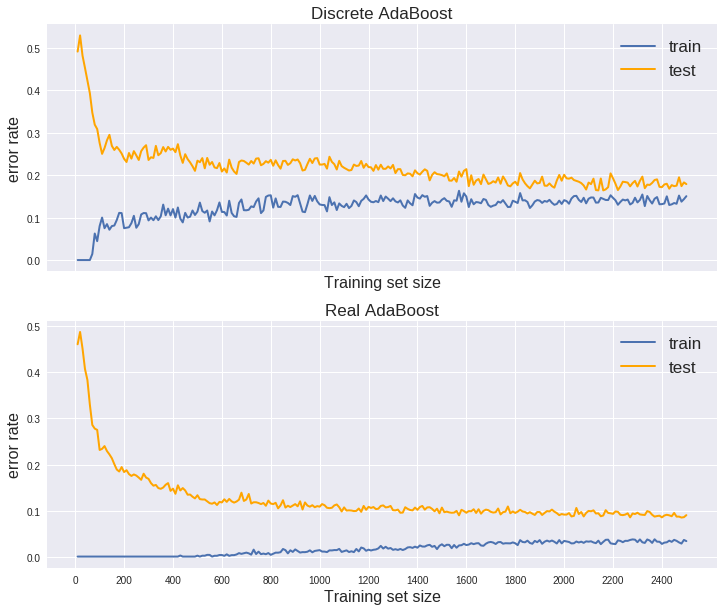

In [112]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,10))
fig.subplots_adjust(hspace=0.2)

plot_learning_curve(ada_discrete, X_train, y_train, X_test, y_test, axes[0])
axes[0].set_title('Discrete AdaBoost', fontsize=17)
axes[0].set_xticks(np.arange(0, len(X_train)+50, 200))
plot_learning_curve(ada_real, X_train, y_train, X_test, y_test, axes[1])
axes[1].set_title('Real AdaBoost', fontsize=17)
plt.show()

---

https://matplotlib.org/gallery/pyplots/align_ylabels.html#sphx-glr-gallery-pyplots-align-ylabels-py

https://matplotlib.org/gallery/subplots_axes_and_figures/ganged_plots.html#sphx-glr-gallery-subplots-axes-and-figures-ganged-plots-py